# Regional Humanintarian EDA

**Reflection Question**

What does the data look like at a regional level? Are there any differences regionally across the years on total funding requirements on a world scale? What about funding recieved? People targeted? Total number of people in need? Is it normal? 

In [852]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [853]:
raw_data = pd.read_csv("../../Data/Raw Data.csv")

In [854]:
raw_data.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [855]:
#
country_df = raw_data[["Country Code"]].drop_duplicates(raw_data[["Country Code"]])
country_codes = country_df["Country Code"]

In [856]:
raw_data.describe()

,Year
count,1259.000000
mean,2017.396346
std,3.972203
min,2010.000000
25%,2014.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


In [857]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   1259 non-null   int64 
 1   Plan                   1259 non-null   object
 2   Crisis Country         1259 non-null   object
 3   Country Code           1236 non-null   object
 4   Metric                 1259 non-null   object
 5   Value                  1259 non-null   object
 6   Standardised Plan      1259 non-null   object
 7   Appeal Type            974 non-null    object
 8   PiN Value for Dataviz  47 non-null     object
 9   OUSG Metric            619 non-null    object
dtypes: int64(1), object(9)
memory usage: 98.5+ KB


In [859]:
#create a dictionary to store regions for each country code
region_dict = {
    # Latin America and the Caribbean
    "CUB": "Latin America and the Caribbean",
    "COL": "Latin America and the Caribbean",
    "DMA": "Latin America and the Caribbean",
    "ECU": "Latin America and the Caribbean",
    "HTI": "Latin America and the Caribbean",
    "GTM": "Latin America and the Caribbean",
    "HND": "Latin America and the Caribbean",
    "NIC": "Latin America and the Caribbean",
    "PER": "Latin America and the Caribbean",
    "VEN": "Latin America and the Caribbean",
    "SLV": "Latin America and the Caribbean",

    # Southern and Eastern Africa
    "BDI": "Southern and Eastern Africa",
    "DJI": "Southern and Eastern Africa",
    "ETH": "Southern and Eastern Africa",
    "KEN": "Southern and Eastern Africa",
    "LSO": "Southern and Eastern Africa",
    "MDG": "Southern and Eastern Africa",
    "MOZ": "Southern and Eastern Africa",
    "MWI": "Southern and Eastern Africa",
    "NAM": "Southern and Eastern Africa",
    "SSD": "Southern and Eastern Africa",
    "TZA": "Southern and Eastern Africa",
    "UGA": "Southern and Eastern Africa",
    "ZWE": "Southern and Eastern Africa",
    "ZMB": "Southern and Eastern Africa",
    "SOM": "Southern and Eastern Africa",

    # West and Central Africa
    "BEN": "West and Central Africa",
    "BFA": "West and Central Africa",
    "CMR": "West and Central Africa",
    "CAF": "West and Central Africa",
    "TCD": "West and Central Africa",
    "CIV": "West and Central Africa",
    "COG": "West and Central Africa",
    "COD": "West and Central Africa",
    "GMB": "West and Central Africa",
    "LBR": "West and Central Africa",
    "MLI": "West and Central Africa",
    "MRT": "West and Central Africa",
    "NER": "West and Central Africa",
    "NGA": "West and Central Africa",
    "SEN": "West and Central Africa",
    "SLE": "West and Central Africa",
    "TGO": "West and Central Africa",

    # Asia and the Pacific
    "AFG": "Asia and the Pacific",
    "BGD": "Asia and the Pacific",
    "IDN": "Asia and the Pacific",
    "KGZ": "Asia and the Pacific",
    "LKA": "Asia and the Pacific",
    "MMR": "Asia and the Pacific",
    "MNG": "Asia and the Pacific",
    "NPL": "Asia and the Pacific",
    "PAK": "Asia and the Pacific",
    "PHL": "Asia and the Pacific",
    "PRK": "Asia and the Pacific",
    "VUT": "Asia and the Pacific",

    # Middle East and North Africa
    "IRN": "Middle East and North Africa",
    "IRQ": "Middle East and North Africa",
    "JOR": "Middle East and North Africa",
    "LBN": "Middle East and North Africa",
    "LBY": "Middle East and North Africa",
    "PSE": "Middle East and North Africa",
    "SDN": "Middle East and North Africa",
    "SYR": "Middle East and North Africa",
    "YEM": "Middle East and North Africa",

    # Europe
    "UKR": "Europe",
    "TUR": "Europe",
}

In [860]:
#use map function to add a region column that matches the country codes as keys to the regions as values
raw_data["Region"] = raw_data["Country Code"].map(region_dict)

In [861]:
raw_data["Region"]

0                  Asia and the Pacific
1                  Asia and the Pacific
2                  Asia and the Pacific
3                  Asia and the Pacific
4                  Asia and the Pacific
                     ...               
1254       Middle East and North Africa
1255       Middle East and North Africa
1256                                NaN
1257                             Europe
1258    Latin America and the Caribbean
Name: Region, Length: 1259, dtype: object

In [862]:
raw_data.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric,Region
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received,Asia and the Pacific
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements,Asia and the Pacific
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN,Asia and the Pacific


In [863]:
#find null values
raw_data.isnull().sum()

Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
Region                     25
dtype: int64

In [864]:
#drop uneeded columns and rows with null values from region column. Value is type object - change to type float, turn to str and remove commas, then convert to float
cleaned_data = raw_data.drop(columns=["PiN Value for Dataviz", "OUSG Metric"])
cleaned_data = cleaned_data.dropna(subset="Region")
cleaned_data["Value"] = cleaned_data["Value"].str.replace(",", "", regex=True).astype(float)

In [865]:
cleaned_data

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,Region
0,2010,Afghanistan,Afghanistan,AFG,People targeted,7.800000e+06,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
1,2010,Afghanistan,Afghanistan,AFG,Funding received,2.238249e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,4.485513e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
3,2010,Afghanistan,Afghanistan,AFG,People targeted,5.400000e+06,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
4,2010,Afghanistan,Afghanistan,AFG,Funding received,3.452466e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
...,...,...,...,...,...,...,...,...,...
1253,2024,South Sudan,South Sudan,SSD,Funding requirements,9.812949e+08,South Sudan,RRP,Southern and Eastern Africa
1254,2024,Sudan,Sudan,SDN,Funding requirements,2.813216e+08,Sudan,RRP,Middle East and North Africa
1255,2024,Syria (3RP),Syria,SYR,Funding requirements,5.540000e+09,Syria (3RP),RRP,Middle East and North Africa
1257,2024,Ukraine,Ukraine,UKR,Funding requirements,1.038000e+09,Ukraine,RRP,Europe


In [866]:
#create new df with only the regions, year, metric, and values

new_df = cleaned_data[["Year","Region", "Metric", "Value"]].copy()

In [867]:
new_df

,Year,Region,Metric,Value
0,2010,Asia and the Pacific,People targeted,7.800000e+06
1,2010,Asia and the Pacific,Funding received,2.238249e+08
2,2010,Asia and the Pacific,Funding requirements,4.485513e+08
3,2010,Asia and the Pacific,People targeted,5.400000e+06
4,2010,Asia and the Pacific,Funding received,3.452466e+08
...,...,...,...,...
1253,2024,Southern and Eastern Africa,Funding requirements,9.812949e+08
1254,2024,Middle East and North Africa,Funding requirements,2.813216e+08
1255,2024,Middle East and North Africa,Funding requirements,5.540000e+09
1257,2024,Europe,Funding requirements,1.038000e+09


In [868]:
new_df.isna().sum()


Year      0
Region    0
Metric    0
Value     0
dtype: int64

In [869]:
#change Metric to string

new_df["Metric"] = new_df["Metric"].astype(str)


In [870]:
region_df = new_df.pivot_table(index=["Region", "Year"], columns="Metric", values="Value")

In [871]:
region_df

Metric                        Funding received  Funding requirements  \
Region                  Year                                           
Asia and the Pacific    2010      3.516785e+08          5.925776e+08   
                        2011               NaN          8.710000e+08   
                        2013      5.136511e+07          1.454678e+08   
                        2014      5.030880e+07          9.423185e+07   
                        2015      5.351915e+07          1.263437e+08   
...                                        ...                   ...   
West and Central Africa 2020      3.631000e+08          4.210167e+08   
                        2021               NaN                   NaN   
                        2022               NaN          7.774734e+08   
                        2023               NaN          9.097102e+08   
                        2024               NaN          9.210701e+08   

Metric                        People in need  People targeted  
Region                  Year                                   
Asia and the Pacific    2010    6.794444e+06     7.333333e+06  
                        2011    1.069000e+07              NaN  
                        2013    1.415000e+07              NaN  
                        2014             NaN              NaN  
                        2015    7.600000e+06              NaN  
...                                      ...              ...  
West and Central Africa 2020    4.816667e+06              NaN  
                        2021    6.249307e+06              NaN  
                        2022    7.312363e+06              NaN  
                        2023    7.738542e+06              NaN  
                        2024    7.226059e+06              NaN  

[67 rows x 4 columns]

Text(0.5, 1.0, 'People in Need vs Funding Requirements')

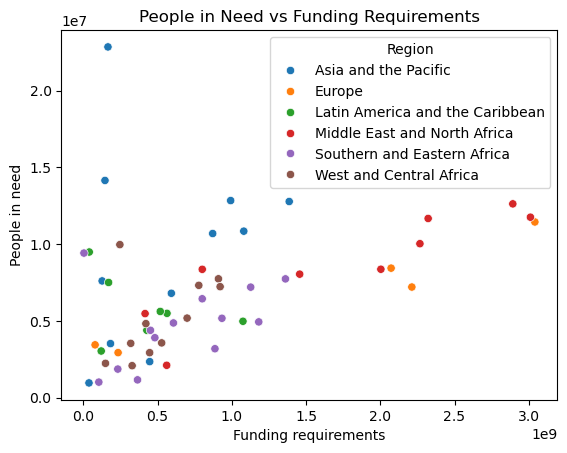

In [872]:
#scatter plot for people in need 
sns.scatterplot(region_df, x="Funding requirements", y="People in need", hue="Region")

plt.title("People in Need vs Funding Requirements")


In [873]:
region_df.corr()

Metric,Funding received,Funding requirements,People in need,People targeted
Metric,,,,
Funding received,1.000000,0.902666,0.329802,0.434396
Funding requirements,0.902666,1.000000,0.420152,0.440930
People in need,0.329802,0.420152,1.000000,0.421115
People targeted,0.434396,0.440930,0.421115,1.000000


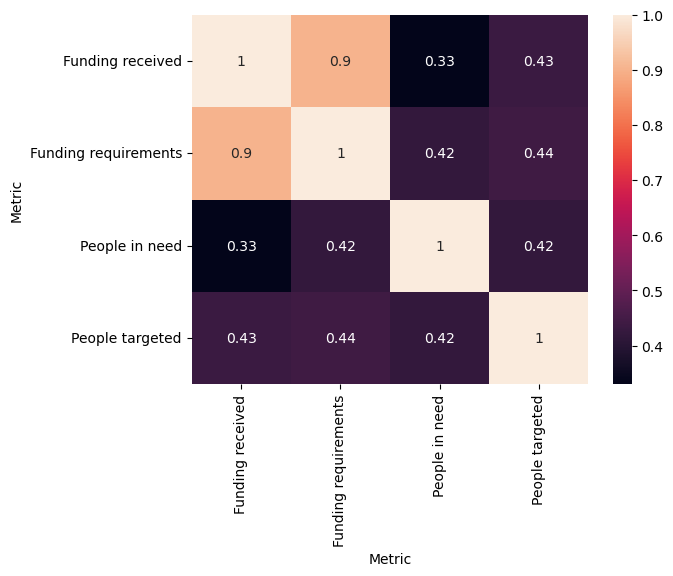

In [874]:
sns.heatmap(region_df.corr(numeric_only=True), annot=True)
plt.show()

Text(0.5, 1.0, 'Funding Received vs Funding Requirements')

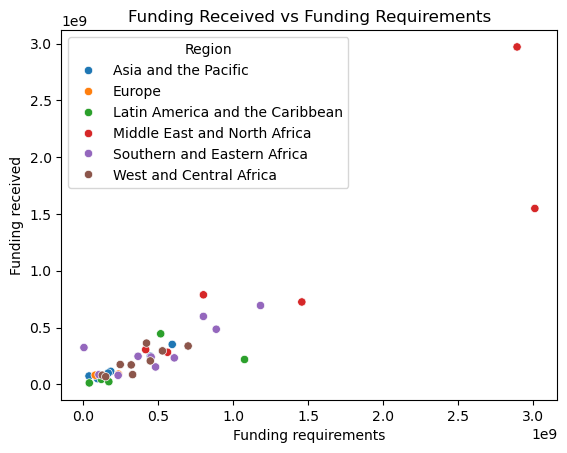

In [875]:
#scatter plot for people in need 
sns.scatterplot(region_df, x="Funding requirements", y="Funding received", hue="Region")

plt.title("Funding Received vs Funding Requirements")

Text(0.5, 1.0, 'People in Need vs People Targeted')

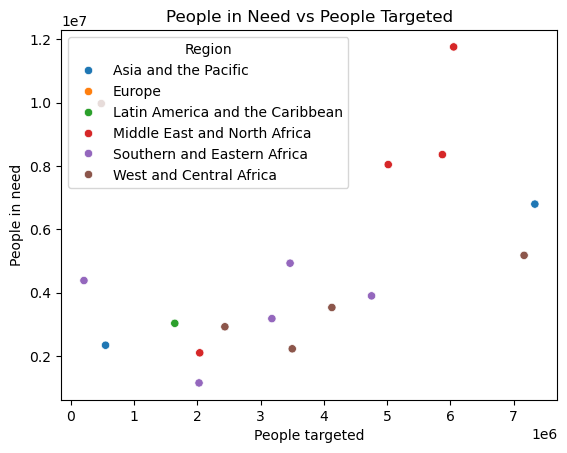

In [876]:
#scatter plot for people in need 
sns.scatterplot(region_df, x="People targeted", y="People in need", hue="Region")

plt.title("People in Need vs People Targeted")

Text(0.5, 1.0, 'Funding Received vs People Targeted')

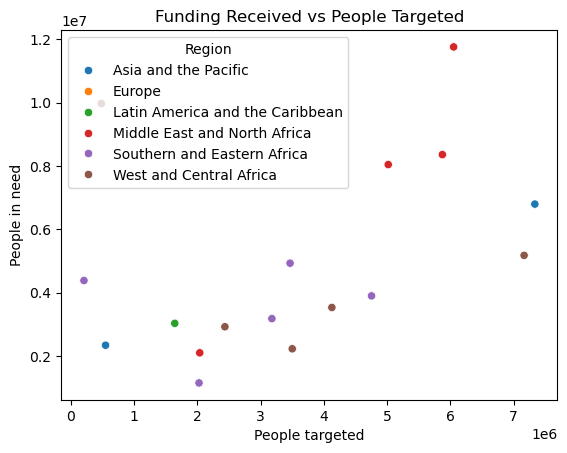

In [877]:
#scatter plot for people in need 
sns.scatterplot(region_df, x="People targeted", y="People in need", hue="Region")

plt.title("Funding Received vs People Targeted")

In [878]:
#store new dfs for each metric
regional_funding_requirements = new_df[new_df["Metric"] == "Funding requirements"].reset_index()
regional_funding_received = new_df[new_df["Metric"] == "Funding received"].reset_index()
regional_people_targeted = new_df[new_df["Metric"] == "People targeted"].reset_index()
regional_people_in_need = new_df[new_df["Metric"] == "People in need"].reset_index()

In [879]:
#rename columns so that value columns are now refered to by specific metric
regional_funding_requirements = regional_funding_requirements.rename(columns={"Value": "Funding Requirements"}).reset_index()
regional_funding_received = regional_funding_received.rename(columns={"Value": "Funding Received"}).reset_index()
regional_people_in_need = regional_people_in_need.rename(columns={"Value": "People in Need"}).reset_index()
regional_people_targeted = regional_people_targeted.rename(columns={"Value": "People Targeted"}).reset_index()

In [880]:
print("People in need dimensions are: ", regional_people_in_need.shape)
print("People targeted dimensions are: ",regional_people_targeted.shape)
print("funding received diminesions are: ", regional_funding_received.shape)
print("Funding required dimensions are: ",regional_funding_requirements.shape)

People in need dimensions are:  (395, 6)
People targeted dimensions are:  (53, 6)
funding received diminesions are:  (300, 6)
Funding required dimensions are:  (486, 6)


In [881]:
regional_people_targeted

,level_0,index,Year,Region,Metric,People Targeted
0,0,0,2010,Asia and the Pacific,People targeted,7800000.0
1,1,3,2010,Asia and the Pacific,People targeted,5400000.0
2,2,6,2010,Asia and the Pacific,People targeted,8800000.0
3,3,44,2010,West and Central Africa,People targeted,3500000.0
4,4,47,2011,West and Central Africa,People targeted,3500000.0
5,5,121,2012,West and Central Africa,People targeted,1621183.0
6,6,124,2012,West and Central Africa,People targeted,1920000.0
7,7,125,2012,West and Central Africa,People targeted,1600000.0
8,8,151,2012,West and Central Africa,People targeted,2283310.0
9,9,154,2012,West and Central Africa,People targeted,2989000.0


In [882]:
type(regional_people_in_need)

pandas.core.frame.DataFrame

In [883]:
#Group by Year and Region and sum the funding
df_grouped = regional_funding_requirements.groupby(["Year", "Region"])["Funding Requirements"].sum().reset_index()


In [884]:
funding_req_pivot = df_grouped.pivot(index="Year", columns="Region", values="Funding Requirements")
funding_req_pivot = funding_req_pivot.fillna(0)  # fill missing values


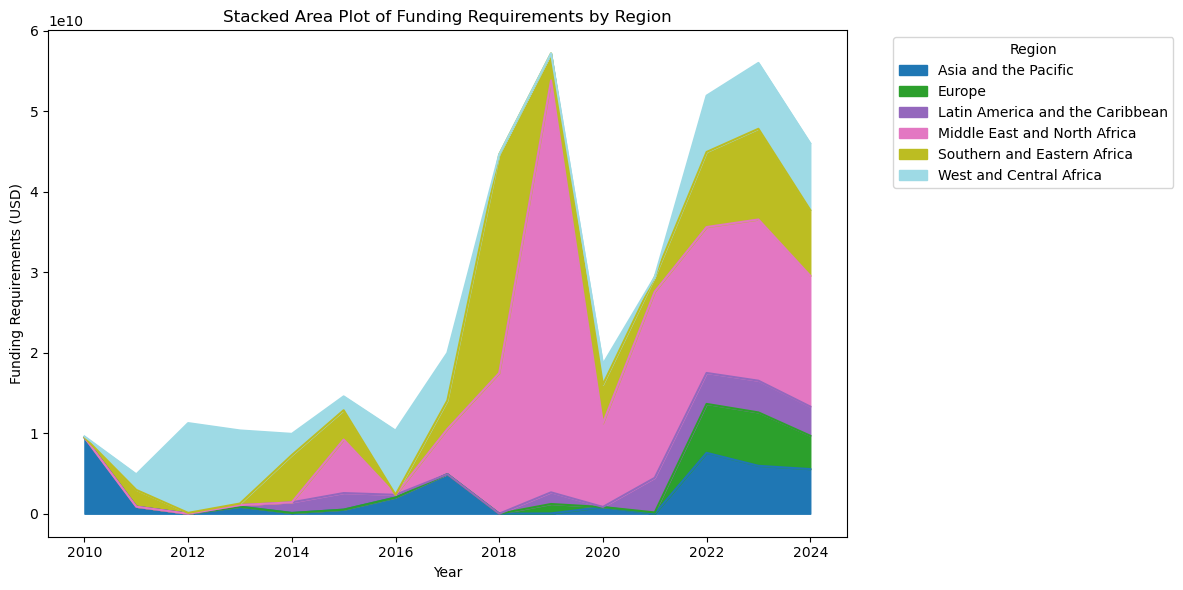

In [885]:
# Stacked plot shows each regions contribution to the total funding requirements for that year
funding_req_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of Funding Requirements by Region")
plt.xlabel("Year")
plt.ylabel("Funding Requirements (USD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

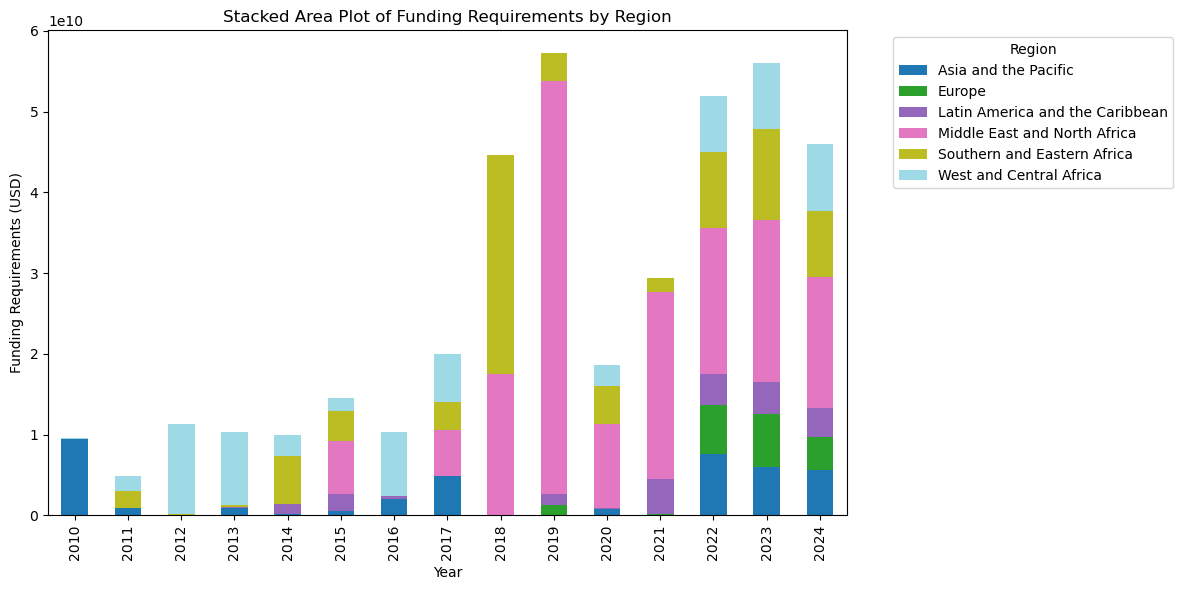

In [886]:
# Stacked plot shows each regions contribution to the total funding requirements for that year
funding_req_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of Funding Requirements by Region")
plt.xlabel("Year")
plt.ylabel("Funding Requirements (USD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Year')

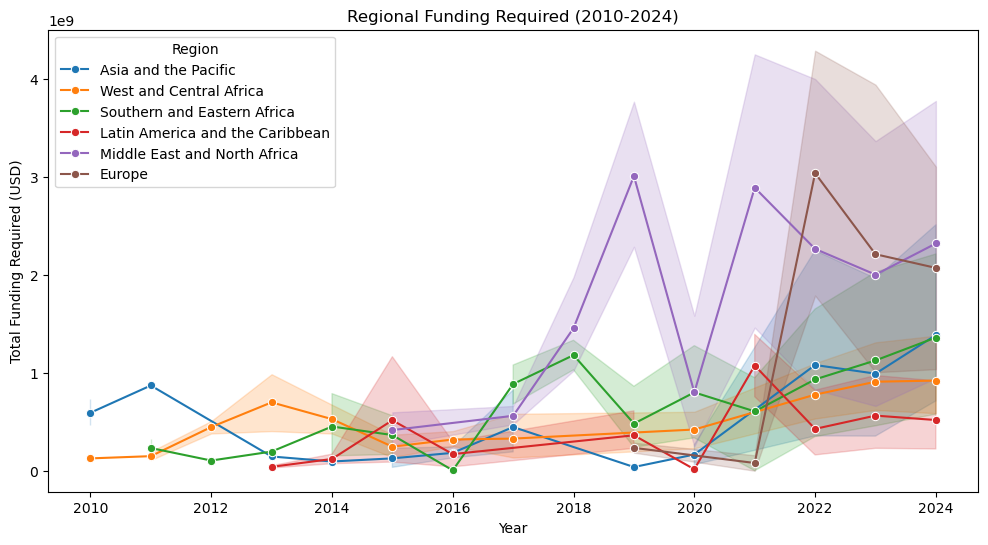

In [887]:
#Plot line graph to show change in funding required over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_funding_requirements, x="Year", y="Funding Requirements", hue="Region", marker="o")

plt.title("Regional Funding Required (2010-2024)")
plt.ylabel("Total Funding Required (USD)")
plt.xlabel("Year")

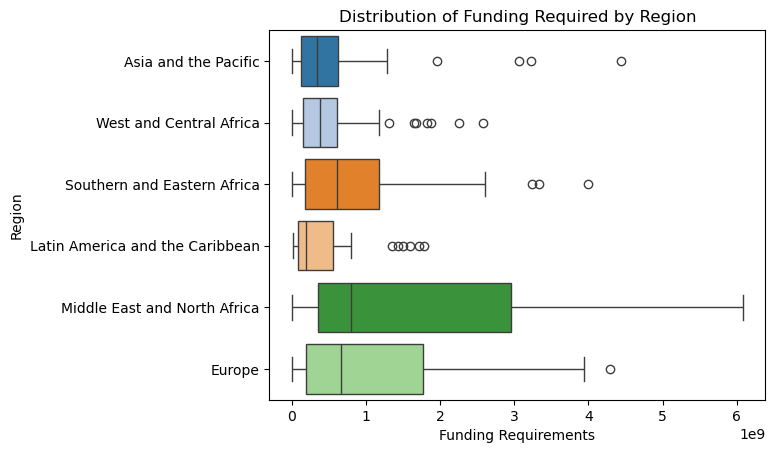

In [888]:
#boxplot to compare distribuition of regions across years

sns.boxplot(data=regional_funding_requirements, y="Region", x="Funding Requirements", hue="Region", palette="tab20")
plt.title("Distribution of Funding Required by Region")
plt.show()

Text(0.5, 0, 'Year')

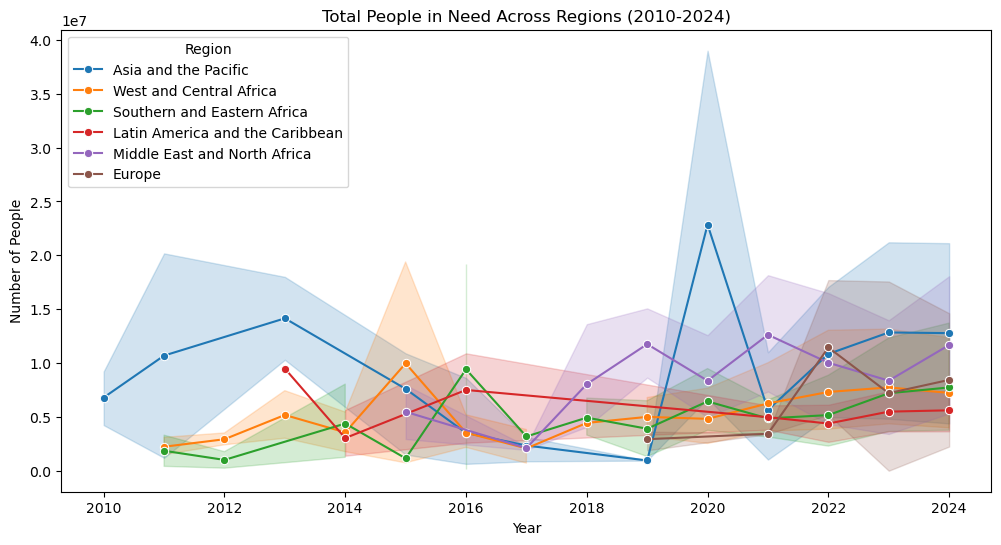

In [889]:
#Plot line graph to show change in people in need over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_people_in_need, x="Year", y="People in Need", hue="Region", marker="o")

plt.title("Total People in Need Across Regions (2010-2024)")
plt.ylabel("Number of People")
plt.xlabel("Year")


In [890]:
#Group by Year and Region and sum the people in need

regional_people_in_need = regional_people_in_need.groupby(["Year", "Region"])["People in Need"].sum().reset_index()

needs_pivot = regional_people_in_need.pivot(index="Year", columns="Region", values="People in Need")
needs_pivot = needs_pivot.fillna(0)

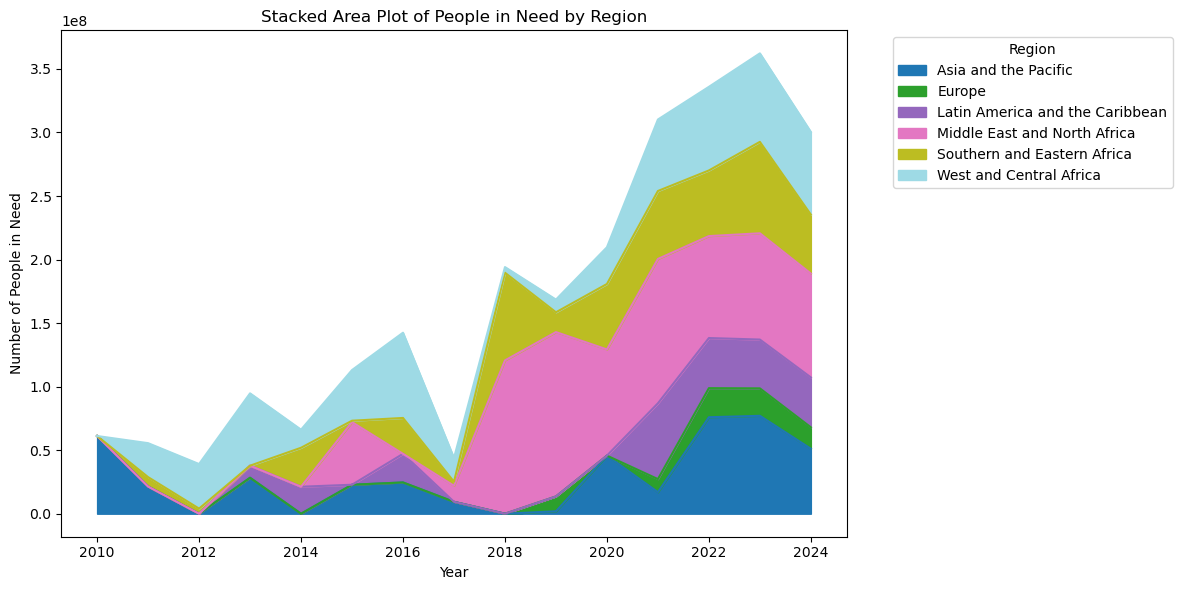

In [891]:
# Stacked plot shows each regions contribution to the total people in for that year
needs_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of People in Need by Region")
plt.xlabel("Year")
plt.ylabel("Number of People in Need")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

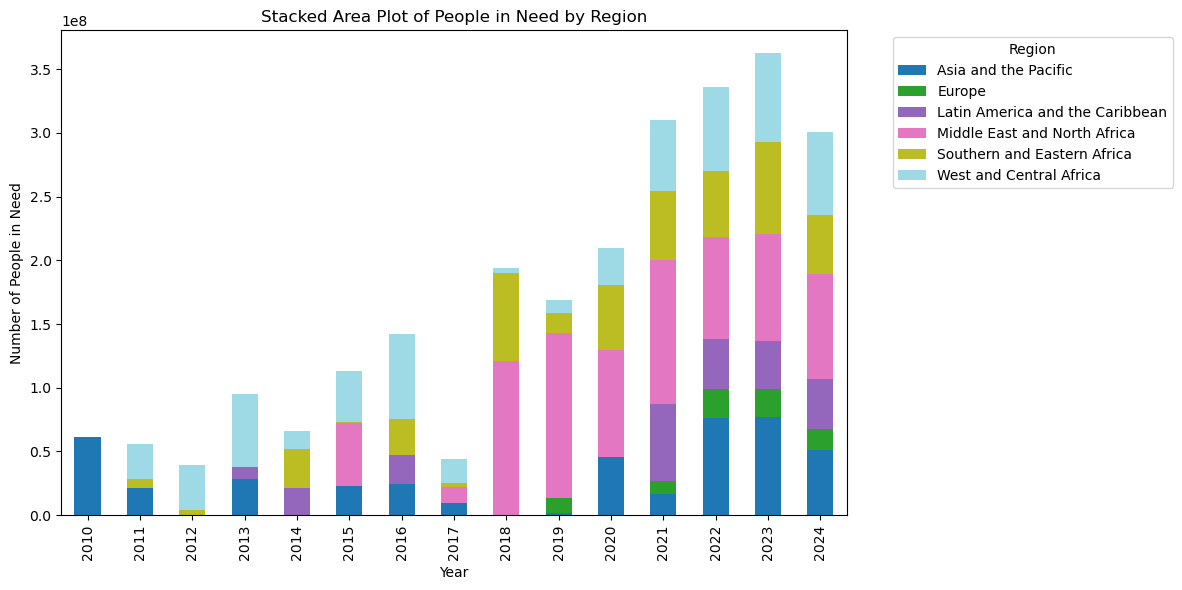

In [892]:
# Stacked plot shows each regions contribution to the total people in for that year
needs_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of People in Need by Region")
plt.xlabel("Year")
plt.ylabel("Number of People in Need")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

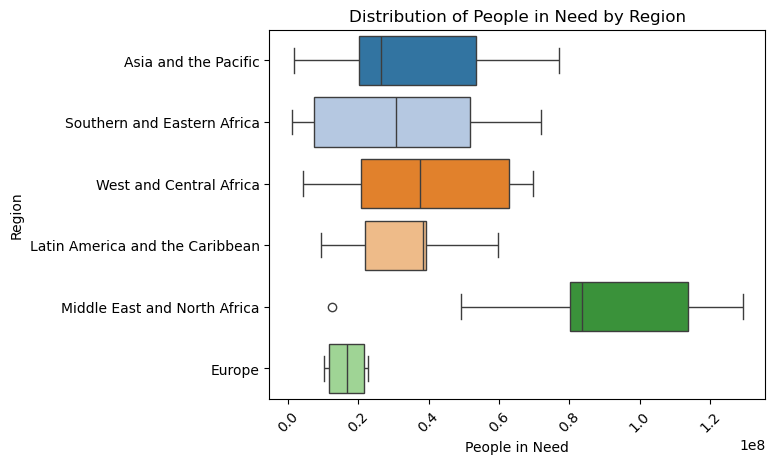

In [893]:
#boxplot to compare distribuition of regions across years

sns.boxplot(data=regional_people_in_need, y="Region", x="People in Need", hue="Region", palette="tab20")
plt.title("Distribution of People in Need by Region")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Year')

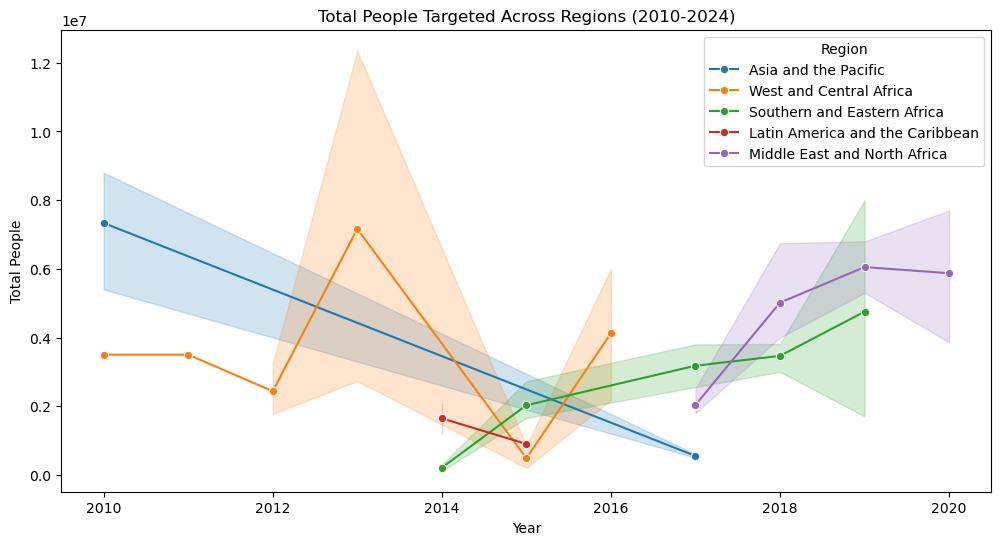

In [894]:
#Plot line graph to show change in people targeted over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_people_targeted, x="Year", y="People Targeted", hue="Region", marker="o")

plt.title("Total People Targeted Across Regions (2010-2024)")
plt.ylabel("Total People")
plt.xlabel("Year")

In [895]:
regional_people_targeted

,level_0,index,Year,Region,Metric,People Targeted
0,0,0,2010,Asia and the Pacific,People targeted,7800000.0
1,1,3,2010,Asia and the Pacific,People targeted,5400000.0
2,2,6,2010,Asia and the Pacific,People targeted,8800000.0
3,3,44,2010,West and Central Africa,People targeted,3500000.0
4,4,47,2011,West and Central Africa,People targeted,3500000.0
5,5,121,2012,West and Central Africa,People targeted,1621183.0
6,6,124,2012,West and Central Africa,People targeted,1920000.0
7,7,125,2012,West and Central Africa,People targeted,1600000.0
8,8,151,2012,West and Central Africa,People targeted,2283310.0
9,9,154,2012,West and Central Africa,People targeted,2989000.0


In [896]:
#Group by Year and Region and sum the people in need

regional_people_targeted = regional_people_targeted.groupby(["Year", "Region"])["People Targeted"].sum().reset_index()

targeted_pivot = regional_people_targeted.pivot(index="Year", columns="Region", values="People Targeted")
targeted_pivot = targeted_pivot.fillna(0)

In [897]:
targeted_pivot

Region,Asia and the Pacific,Latin America and the Caribbean,Middle East and North Africa,Southern and Eastern Africa,West and Central Africa
Year,,,,,
2010,22000000.0,0.0,0.0,0.0,3500000.0
2011,0.0,0.0,0.0,0.0,3500000.0
2012,0.0,0.0,0.0,0.0,14613493.0
2013,0.0,0.0,0.0,0.0,28653502.0
2014,0.0,3288000.0,0.0,626000.0,0.0
2015,0.0,900000.0,0.0,6081500.0,1448717.0
2016,0.0,0.0,0.0,0.0,20630226.0
2017,1100000.0,0.0,6114398.0,6356404.0,0.0
2018,0.0,0.0,15050000.0,10397000.0,0.0


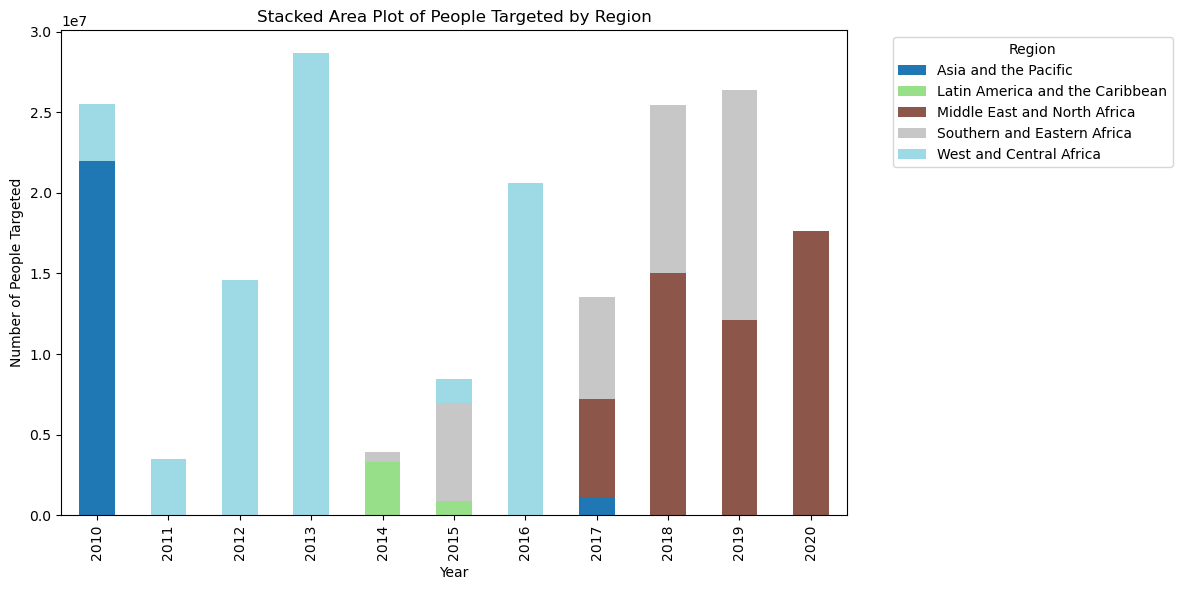

In [898]:
# Stacked plot shows each regions contribution to the total people in need for that year
targeted_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of People Targeted by Region")
plt.xlabel("Year")
plt.ylabel("Number of People Targeted")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of People Targeted by Region')

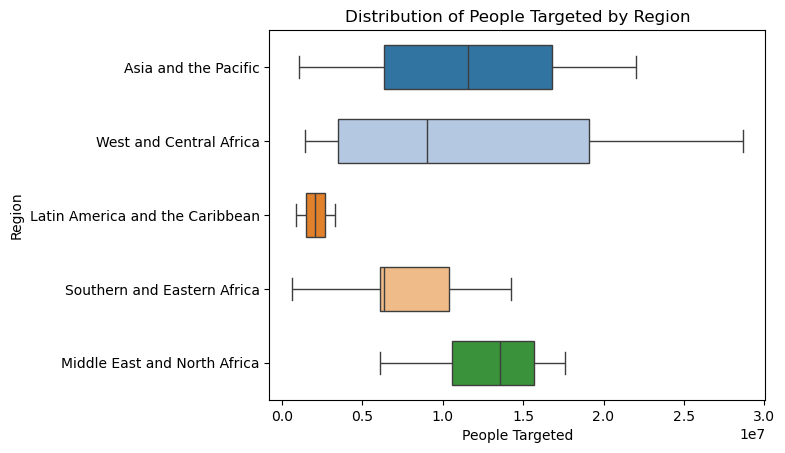

In [899]:
#plot people targeted with horizontal boxes 
sns.boxplot(regional_people_targeted, x="People Targeted", y="Region", hue="Region", width=.6, palette="tab20")

plt.title("Distribution of People Targeted by Region")


In [921]:
regional_funding_received

,Year,Region,Funding Received
0,2010,Asia and the Pacific,4.923500e+09
1,2010,West and Central Africa,1.619487e+08
2,2011,Southern and Eastern Africa,6.359000e+08
3,2011,West and Central Africa,8.080966e+08
4,2012,Southern and Eastern Africa,8.540000e+07
5,2012,West and Central Africa,4.338768e+09
6,2013,Asia and the Pacific,2.568256e+08
7,2013,Latin America and the Caribbean,6.365051e+07
8,2013,West and Central Africa,4.391988e+09
9,2014,Asia and the Pacific,1.006176e+08


Text(0.5, 0, 'Year')

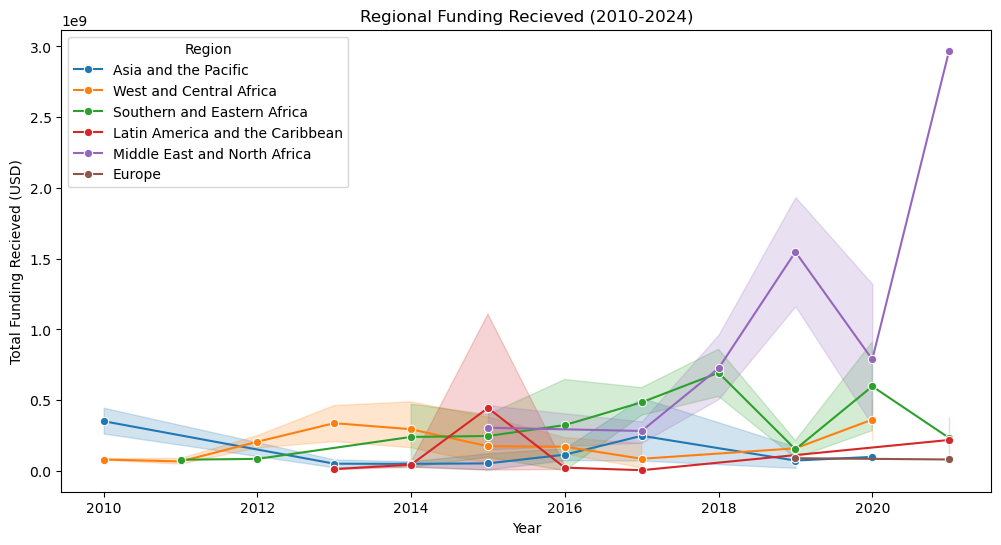

In [901]:
#Plot line graph to show change in funding recieved over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_funding_received, x="Year", y="Funding Received", hue="Region", marker="o")

plt.title("Regional Funding Recieved (2010-2024)")
plt.ylabel("Total Funding Recieved (USD)")
plt.xlabel("Year")

In [902]:
#Group by Year and Region and sum the people in need

regional_funding_received = regional_funding_received.groupby(["Year", "Region"])["Funding Received"].sum().reset_index()

funding_received_pivot = regional_funding_received.pivot(index="Year", columns="Region", values="Funding Received")
funding_received_pivot_pivot = funding_received_pivot.fillna(0)

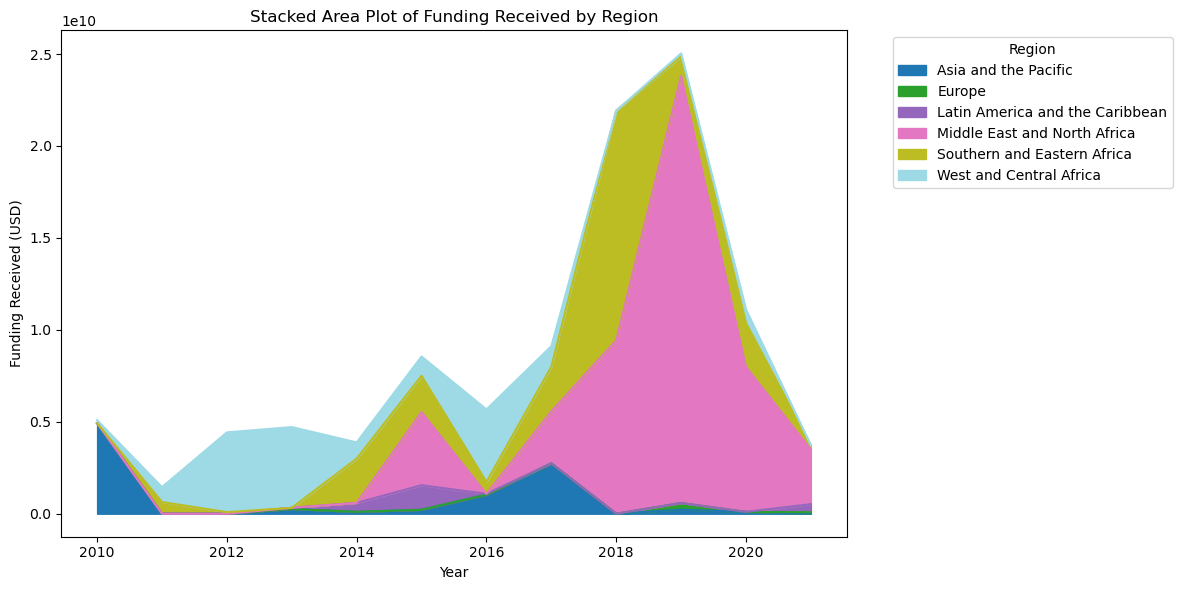

In [903]:
# Stacked plot shows each regions contribution to the total people in for that year
funding_received_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of Funding Received by Region")
plt.xlabel("Year")
plt.ylabel("Funding Received (USD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

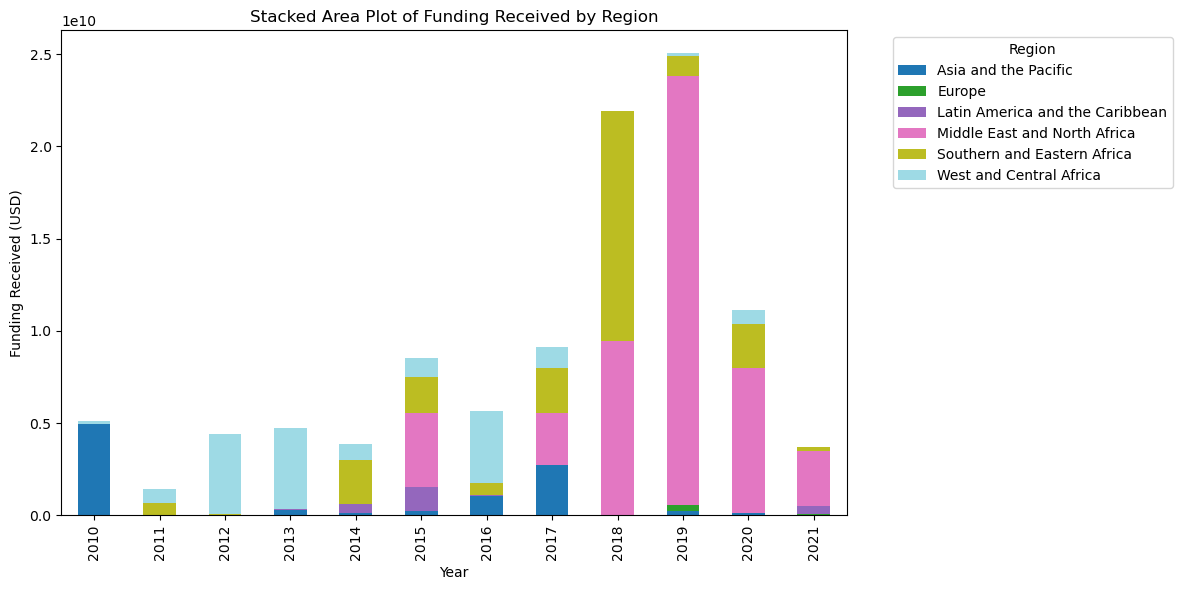

In [904]:
# Stacked bar plot shows each regions contribution to the total people in for that year
funding_received_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Area Plot of Funding Received by Region")
plt.xlabel("Year")
plt.ylabel("Funding Received (USD)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Funding Recieved by Region')

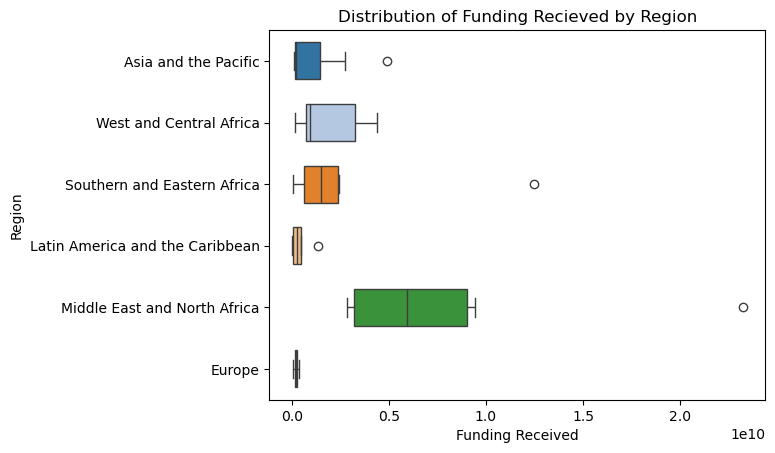

In [905]:
#plot people targeted with horizontal boxes 
sns.boxplot(regional_funding_received, x="Funding Received", y="Region", hue="Region", width=.6, palette="tab20")

plt.title("Distribution of Funding Recieved by Region")

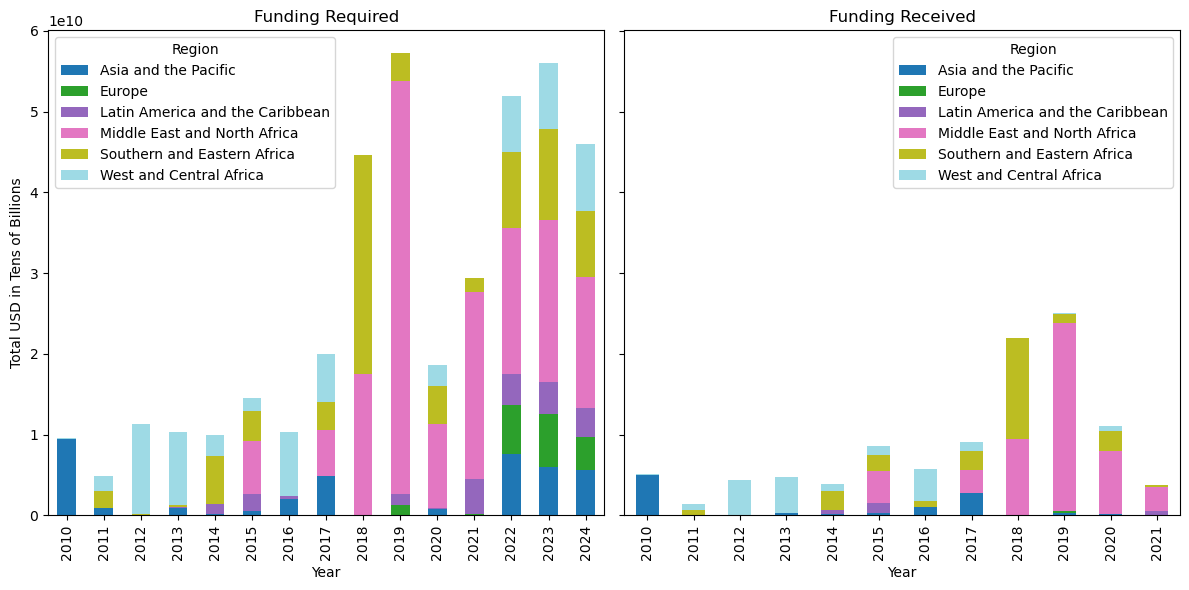

In [906]:
#make side by side plots for funding recieved vs required

fig, axes = plt.subplots(1,2, figsize=(14, 16), sharey=True)

funding_req_pivot.plot(ax=axes[0],kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', title="Funding Required")
axes[0].set_ylabel("Total USD in Tens of Billions")

funding_received_pivot.plot(ax=axes[1],kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', title="Funding Received")


plt.tight_layout()
plt.ylabel("Total USD (10s of Billions)")
plt.show()



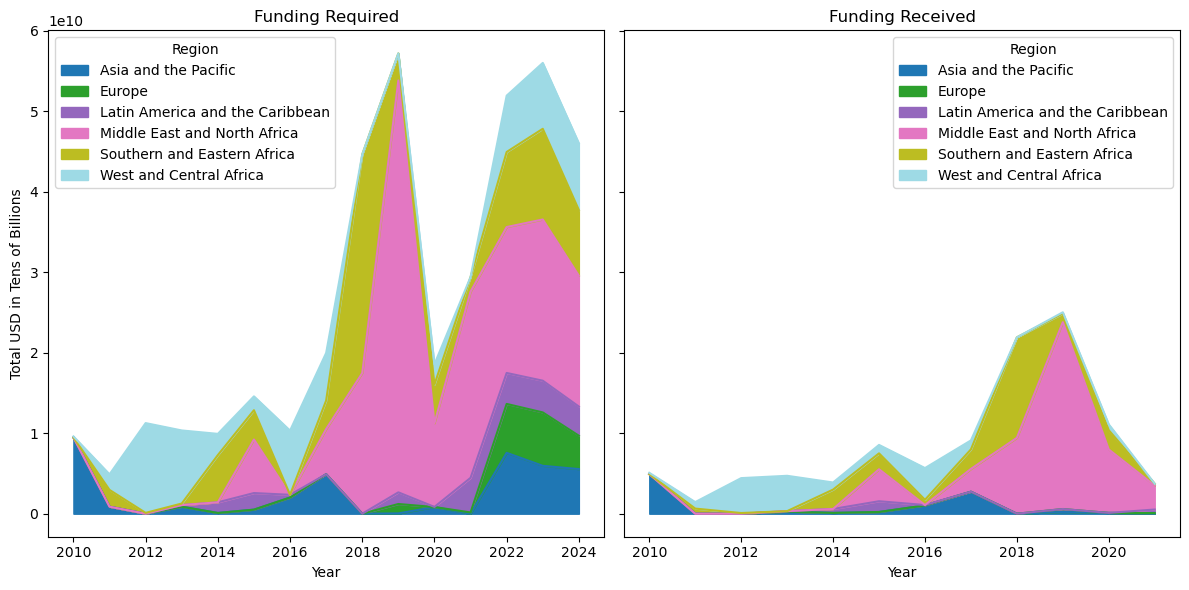

In [920]:
#make side by side plots for funding recieved vs required

fig, axes = plt.subplots(1,2, figsize=(14, 16), sharey=True)

funding_req_pivot.plot(ax=axes[0],kind='area', stacked=True, figsize=(12, 6), colormap='tab20', title="Funding Required")
axes[0].set_ylabel("Total USD in Tens of Billions")

funding_received_pivot.plot(ax=axes[1],kind='area', stacked=True, figsize=(12, 6), colormap='tab20', title="Funding Received")


plt.tight_layout()
plt.ylabel("Total USD (10s of Billions)")
plt.show()

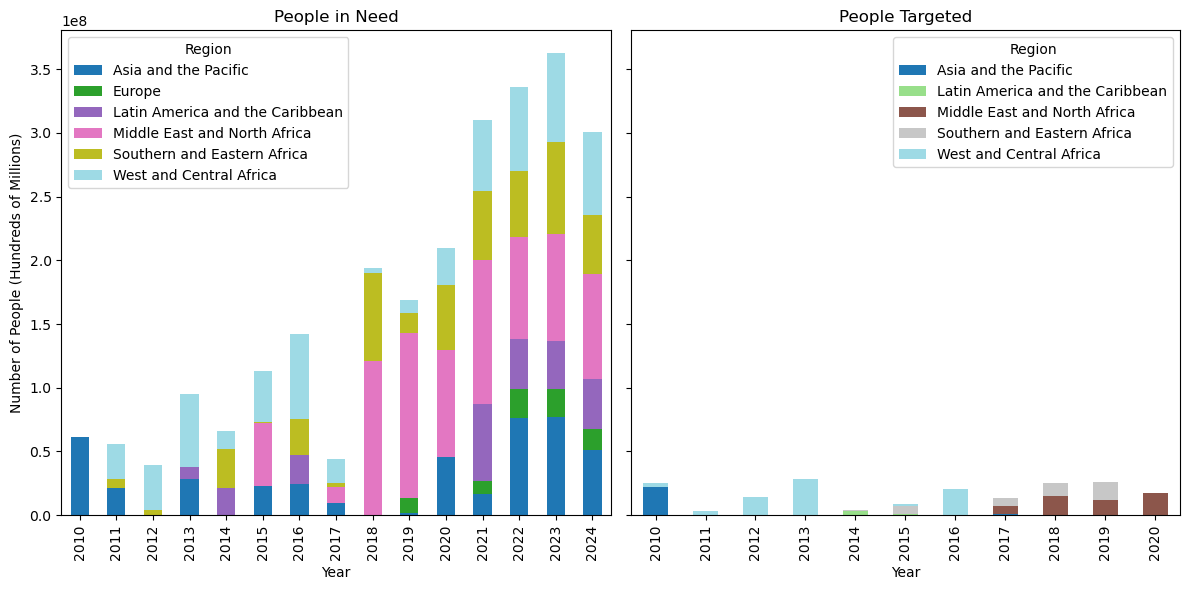

In [907]:
#make side by side plots for people in need vs targeted

fig, axes = plt.subplots(1,2, figsize=(14, 16), sharey=True)

needs_pivot.plot(ax=axes[0],kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', title="People in Need")
axes[0].set_ylabel("Number of People (Hundreds of Millions)")


targeted_pivot.plot(ax=axes[1],kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', title="People Targeted")

plt.tight_layout()
plt.show()

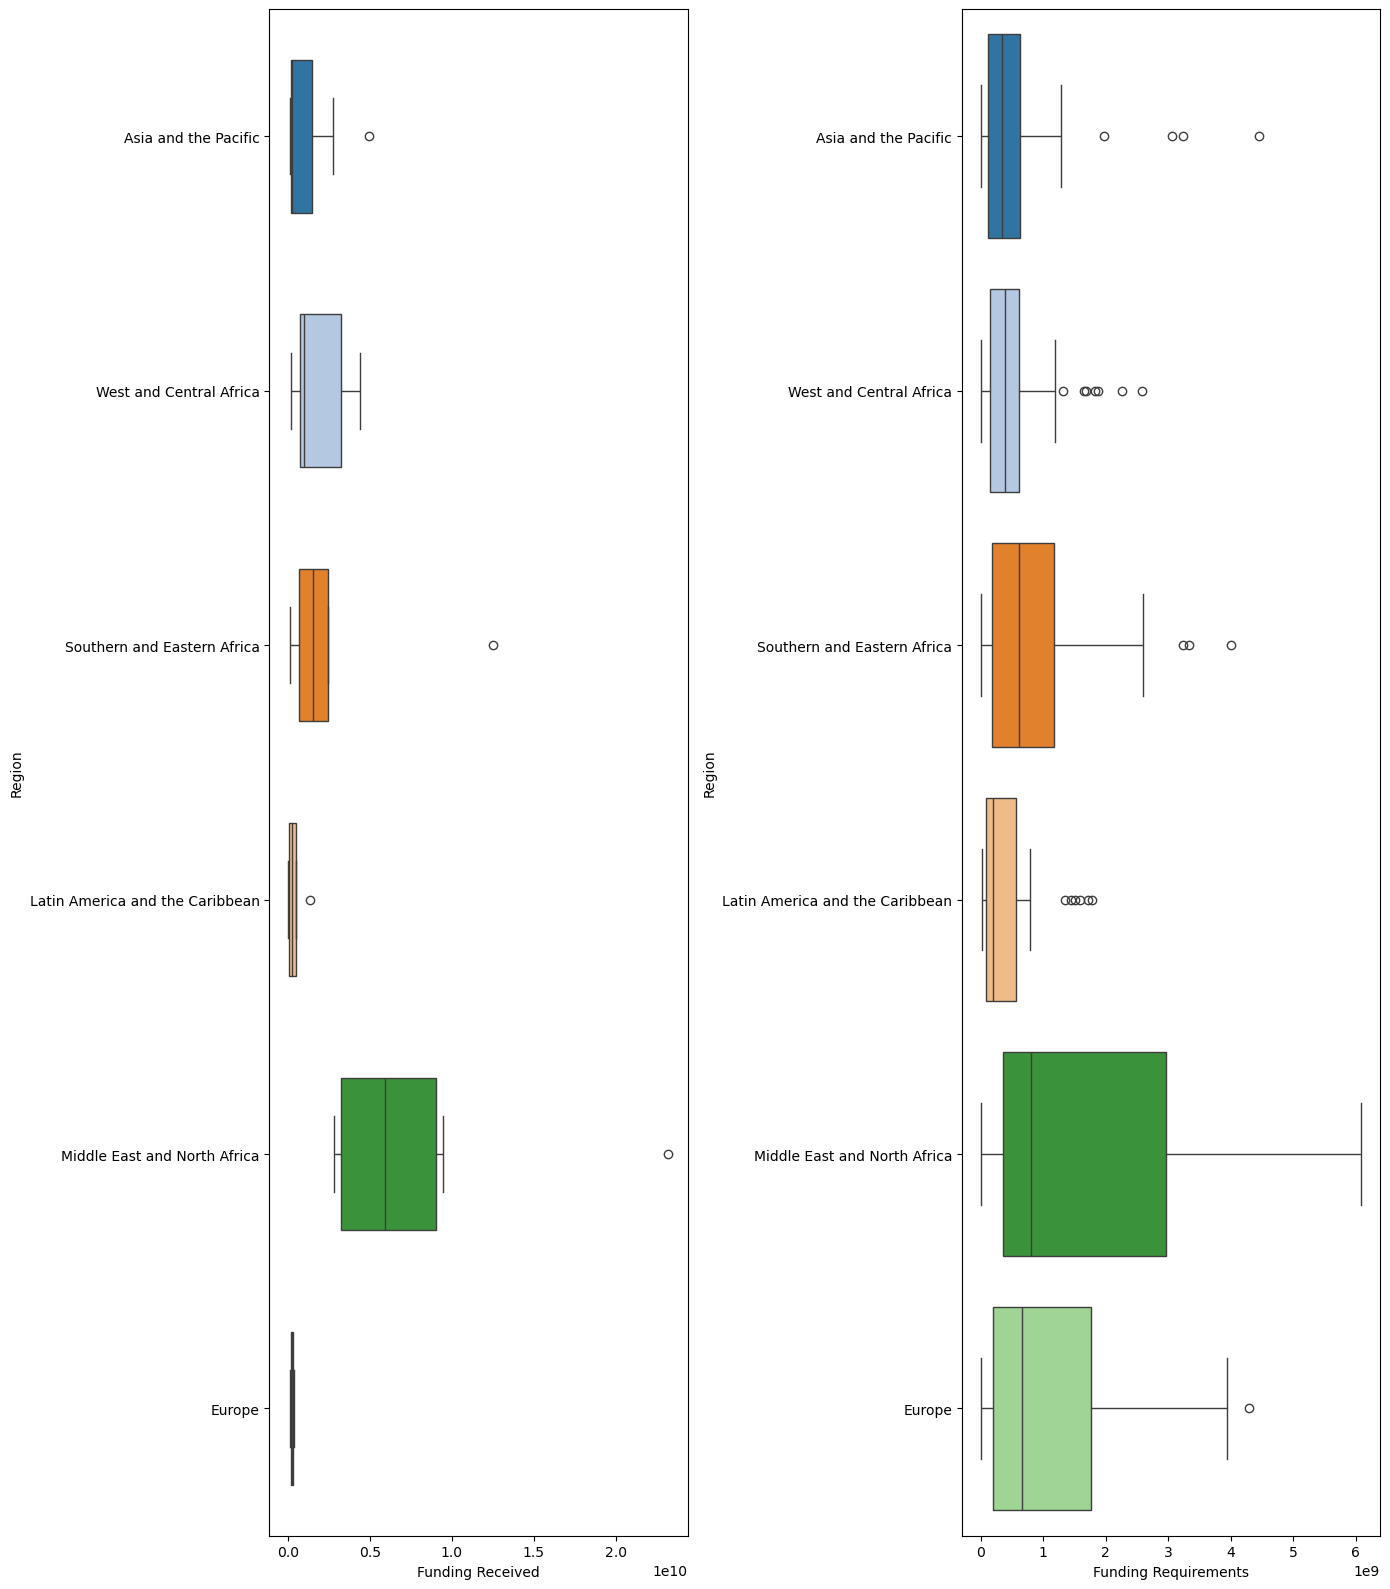

In [908]:
#plot side by side of distributions
fig, axes = plt.subplots(1,2, figsize=(14, 16))

sns.boxplot(regional_funding_received, x="Funding Received", y="Region", hue="Region", width=.6, palette="tab20", ax=axes[0],)
sns.boxplot(data=regional_funding_requirements, y="Region", x="Funding Requirements", hue="Region", palette="tab20", ax=axes[1])


plt.tight_layout()
plt.show()

In [909]:
# merge dataframe
merged_df = pd.merge(regional_funding_requirements, regional_funding_received, on=["Region", "Year"], how="outer")
merged_df = pd.merge(merged_df, regional_people_in_need, on=["Region", "Year"], how="outer")
merged_df = pd.merge(merged_df, regional_people_targeted, on=["Region", "Year"], how="outer")


In [910]:
merged_df = merged_df.drop(columns=["level_0", "index", "Metric", "Year"])

In [911]:
#correlation by region

ap_df= merged_df[merged_df["Region"] == "Asia and the Pacific"]

ap_df.corr(numeric_only=True)


,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.552981,0.348746,0.175374
Funding Received,0.552981,1.000000,0.598649,1.000000
People in Need,0.348746,0.598649,1.000000,1.000000
People Targeted,0.175374,1.000000,1.000000,1.000000


In [912]:
wca_df= merged_df[merged_df["Region"] == "West and Central Africa"]

wca_df.corr(numeric_only=True)

,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.249787,0.292538,0.434846
Funding Received,0.249787,1.000000,0.707204,0.840761
People in Need,0.292538,0.707204,1.000000,0.744237
People Targeted,0.434846,0.840761,0.744237,1.000000


In [913]:
sea_df= merged_df[merged_df["Region"] == "Southern and Eastern Africa"]

sea_df.corr(numeric_only=True)

,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.615480,0.411378,0.338854
Funding Received,0.615480,1.000000,0.834816,0.448304
People in Need,0.411378,0.834816,1.000000,0.327086
People Targeted,0.338854,0.448304,0.327086,1.000000


In [914]:
lac_df= merged_df[merged_df["Region"] == "Latin America and the Caribbean"]

lac_df.corr(numeric_only=True)

,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.266991,0.578565,-0.493028
Funding Received,0.266991,1.000000,0.423551,-1.000000
People in Need,0.578565,0.423551,1.000000,NaN
People Targeted,-0.493028,-1.000000,NaN,1.000000


In [915]:
mena_df= merged_df[merged_df["Region"] == "Middle East and North Africa"]

mena_df.corr(numeric_only=True)

,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.483059,0.420816,-0.004929
Funding Received,0.483059,1.000000,0.700555,0.091379
People in Need,0.420816,0.700555,1.000000,0.571702
People Targeted,-0.004929,0.091379,0.571702,1.000000


In [916]:
eu_df= merged_df[merged_df["Region"] == "Europe"]

eu_df.corr(numeric_only=True)

,Funding Requirements,Funding Received,People in Need,People Targeted
Funding Requirements,1.000000,0.723199,0.77881,NaN
Funding Received,0.723199,1.000000,1.00000,NaN
People in Need,0.778810,1.000000,1.00000,NaN
People Targeted,NaN,NaN,NaN,NaN


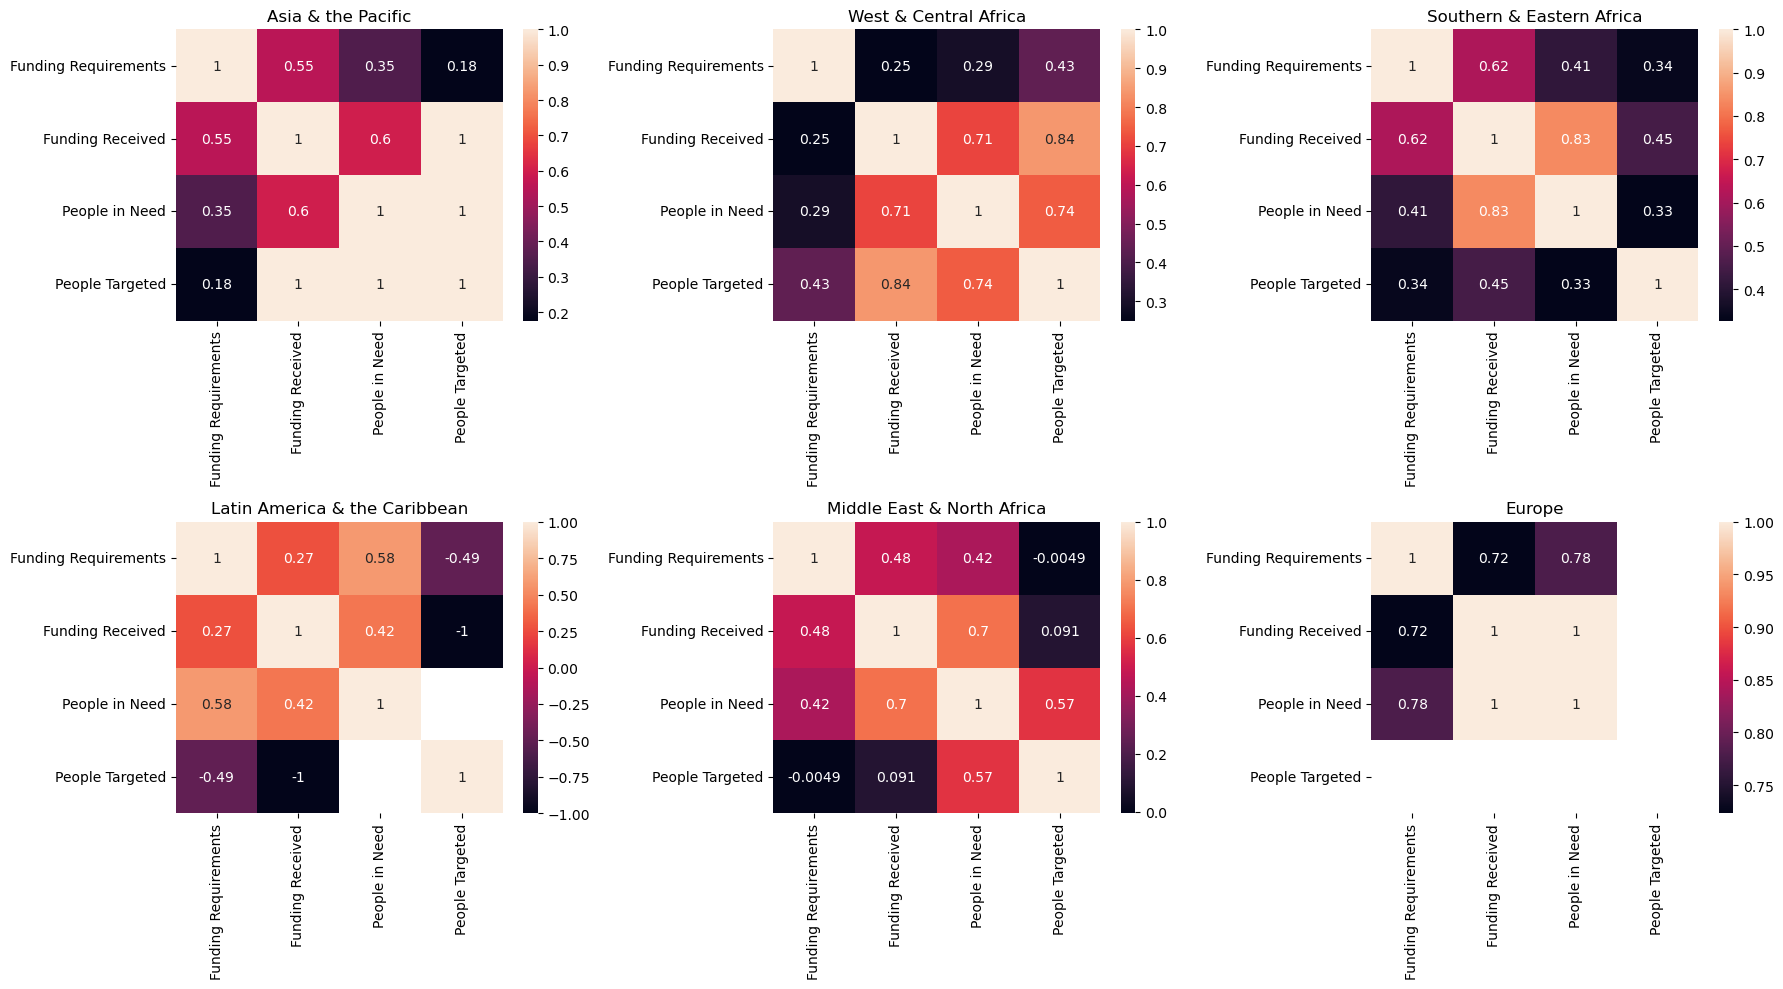

In [917]:

fig, axes = plt.subplots(2,3, figsize=(18, 10))
axes = axes.flatten()



sns.heatmap(ap_df.corr(numeric_only=True), annot=True, ax=axes[0])
sns.heatmap(wca_df.corr(numeric_only=True), annot=True, ax=axes[1])
sns.heatmap(sea_df.corr(numeric_only=True), annot=True, ax=axes[2])
sns.heatmap(lac_df.corr(numeric_only=True), annot=True, ax=axes[3])
sns.heatmap(mena_df.corr(numeric_only=True), annot=True, ax=axes[4])
sns.heatmap(eu_df.corr(numeric_only=True), annot=True, ax=axes[5])

axes[0].set_title("Asia & the Pacific")
axes[1].set_title("West & Central Africa")
axes[2].set_title("Southern & Eastern Africa")
axes[3].set_title("Latin America & the Caribbean")
axes[4].set_title("Middle East & North Africa")
axes[5].set_title("Europe")
plt.tight_layout()


Text(0.5, 0.98, 'Distubions for Each Metric Across Regions')

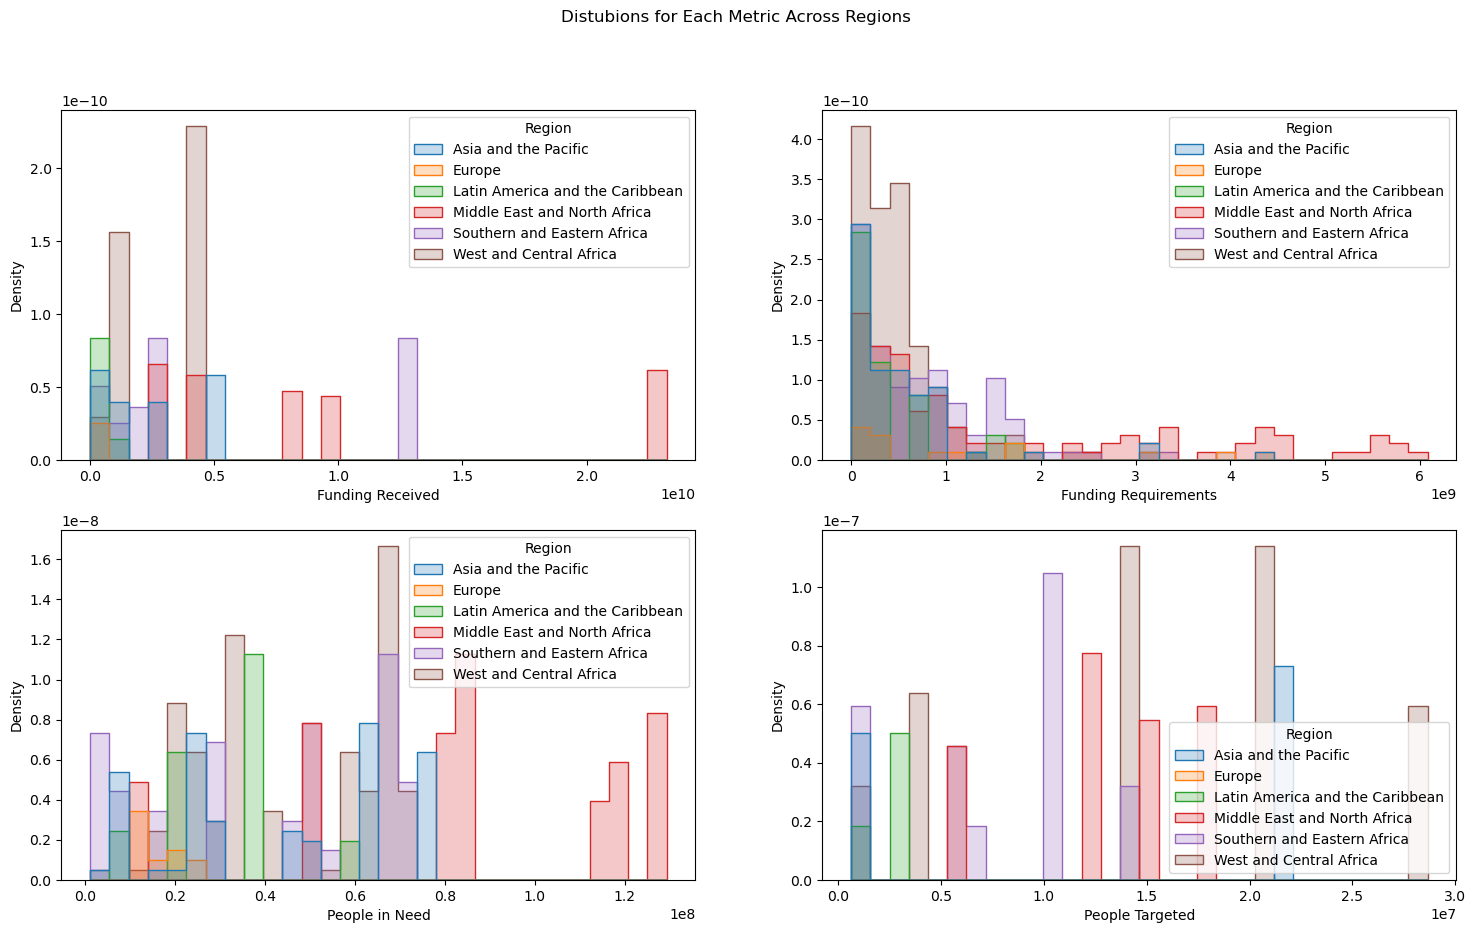

In [ ]:
#Make histograms for each metric
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.histplot(data=merged_df, x="Funding Received", hue="Region", bins=30, element="step", stat= "density", ax=axes[0])
sns.histplot(data=merged_df, x="Funding Requirements", hue="Region", bins=30, element="step", stat= "density",ax=axes[1])
sns.histplot(data=merged_df, x="People in Need", hue="Region", bins=30, element="step", stat= "density",ax=axes[2])
sns.histplot(data=merged_df, x="People Targeted", hue="Region", bins=30, element="step", stat= "density",ax=axes[3])

plt.suptitle("Distubions for Each Metric Across Regions")



**Reflection**

What does the data look like at a regional level? Are there any differences regionally across the years on total funding requirements on a world scale? What about funding recieved? People targeted? Total number of people in need? Is it normal? 

When the data is catergorized by region you can see that certain regions of the world receive more humanitarian funding than others. The Middle East and Africa appear to recieve a greater proportion of the global humitarian funding. When you look at the stacked plots for 'funding recieved' and 'funding required' you can see that the Middle East and Africa take up a large portion of the area after the year 2015.

Also when the distrubitions are plotted via boxplots, the boxplot for the Middle East and Africa shows substantionally greater value for funding metrics. With a pearson coefficient of 0.7, the correlation for people in need versus funding recieved for that region is relatively high when compared to other regions. This correlation is seen even more when you look at West & Central Africa, where the correlation for people in need and people targeted is high (0.74). However when you look at the data, there is not much data for the metric "People targeted," therefore it might not be the best metric to draw conclusions from. 

When you look at the distributions of the data, nothing appears clearly normal. Funding requirements however appreas to be right-skewed, meaning that more frequently regioins requireded lower funds. But you can also see that the tail is mostly made up of the Middle East and North Africa region suggesting that this region requires more funds than other regions. This is also supported by the higher proportion of people in need in that same region. 

From a broader perspective, the gap between funding requirements and actual funding received remains wide across all regions and years. This unmet need highlights a persistent shortfall in global humanitarian funding. Despite increased recognition of crises, funding often lags behind needs, leaving many vulnerable populations without sufficient aid.

An aanlysis of world events that conicides with this timeframe, would provide more insigt into what causes might have impacted these metrics for each of these regions. 


